# Analysis of Cases, as of May 1, 2020

In [1]:
from IPython.display import Image

![title](coronavirus.png)

### Import the required libraries and load the data used in analysis

* Pandas - for dataset handeling
* Numpy - to perform operations on array
* Matplotlib - for visualization 
* pycountry_convert - Library for getting continent (name) to from their country names
* ARIMA, Prophet - Prediction Models

In [2]:
#import required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker 
import seaborn as sns
import pycountry
import pycountry_convert as pc
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
from datetime import datetime, timedelta,date
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from fbprophet import Prophet
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA


In [3]:
#load the data
case_time = pd.read_csv("cases_time_1.csv",parse_dates=['Last_Update'])
df_confirmed = pd.read_csv('time_series_covid19_confirmed_global_1.csv')
df_deaths = pd.read_csv('time_series_covid19_deaths_global_1.csv')
covid=pd.read_csv("covid_19_data.csv")

### Preprocessing of data analyzing the cases around the world

In [4]:
print("Size/Shape of the dataset: ",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type of each column:\n",covid.dtypes)

Size/Shape of the dataset:  (20574, 8)
Checking for null values:
 SNo                    0
ObservationDate        0
Province/State     10548
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
Checking Data-type of each column:
 SNo                 int64
ObservationDate    object
Province/State     object
Country/Region     object
Last Update        object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object


In [5]:
#Dropping column as SNo is of no use, and "Province/State" contains too many missing values
covid.drop(["SNo"],1,inplace=True)

In [6]:
#Converting "Observation Date" into Datetime format
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])


In [7]:
#Grouping different types of cases as per the date
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()

In [8]:
print("Basic Information")
print("Totol number of countries with Disease Spread: ",len(covid["Country/Region"].unique()))
print("Total number of Confirmed Cases around the World: ",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered Cases around the World: ",datewise["Recovered"].iloc[-1])
print("Total number of Deaths Cases around the World: ",datewise["Deaths"].iloc[-1])
print("Total number of Active Cases around the World: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed Cases around the World: ",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])
print("Approximate number of Confirmed Cases per Day around the World: ",np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Recovered Cases per Day around the World: ",np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Death Cases per Day around the World: ",np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Confirmed Cases per hour around the World: ",np.round(datewise["Confirmed"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Recovered Cases per hour around the World: ",np.round(datewise["Recovered"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Death Cases per hour around the World: ",np.round(datewise["Deaths"].iloc[-1]/((datewise.shape[0])*24)))
print("Number of Confirmed Cases in last 24 hours: ",datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2])
print("Number of Recovered Cases in last 24 hours: ",datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2])
print("Number of Death Cases in last 24 hours: ",datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2])

Basic Information
Totol number of countries with Disease Spread:  222
Total number of Confirmed Cases around the World:  3343777
Total number of Recovered Cases around the World:  1053327
Total number of Deaths Cases around the World:  238650
Total number of Active Cases around the World:  2051800
Total number of Closed Cases around the World:  1291977
Approximate number of Confirmed Cases per Day around the World:  33107.0
Approximate number of Recovered Cases per Day around the World:  10429.0
Approximate number of Death Cases per Day around the World:  2363.0
Approximate number of Confirmed Cases per hour around the World:  1379.0
Approximate number of Recovered Cases per hour around the World:  435.0
Approximate number of Death Cases per hour around the World:  98.0
Number of Confirmed Cases in last 24 hours:  86931
Number of Recovered Cases in last 24 hours:  38574
Number of Death Cases in last 24 hours:  5262


Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Cases

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 <a list of 101 Text major ticklabel objects>)

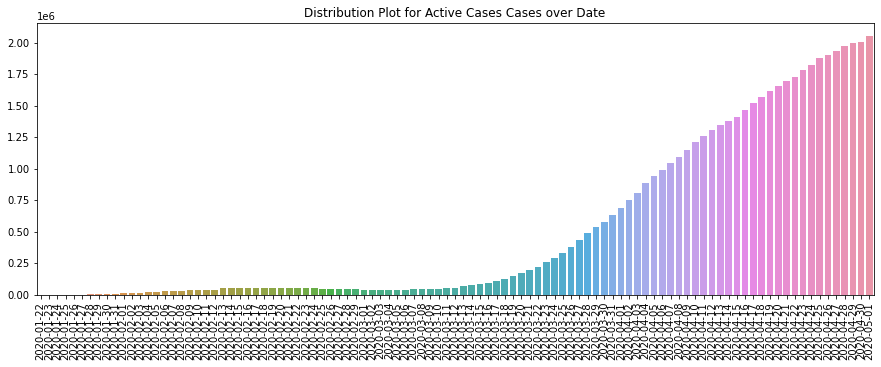

In [9]:

plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date, y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distribution Plot for Active Cases Cases over Date")
plt.xticks(rotation=90)

Increase in number of Active Cases is probably an indication of Recovered case or Death case number is dropping in comparison to number of Confirmed Cases drastically. Will look for the conclusive evidence for the same


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 <a list of 101 Text major ticklabel objects>)

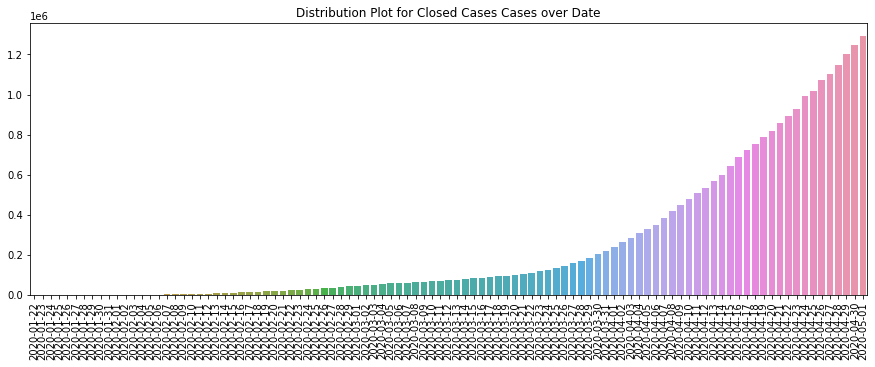

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date, y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distribution Plot for Closed Cases Cases over Date")
plt.xticks(rotation=90)

Closed Cases = Number of Recovered Cases + Number of Death Cases

Increase in number of Closed classes imply either more patients are getting recovered from the disease or more pepole are dying because of COVID-19


<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, **kwargs)>

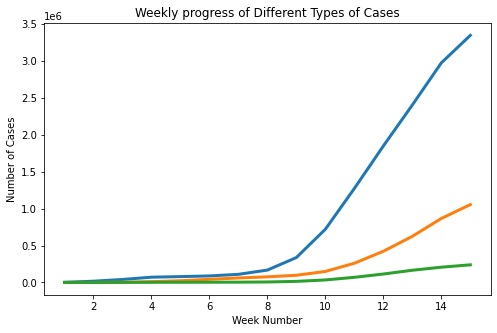

In [11]:

datewise["WeekOfYear"]=datewise.index.weekofyear

week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1

plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.ylabel("Number of Cases")
plt.xlabel("Week Number")
plt.title("Weekly progress of Different Types of Cases")
plt.xlabel


Average increase in number of Confirmed Cases every day:  33101.0
Average increase in number of Recovered Cases every day:  10429.0
Average increase in number of Deaths Cases every day:  2363.0


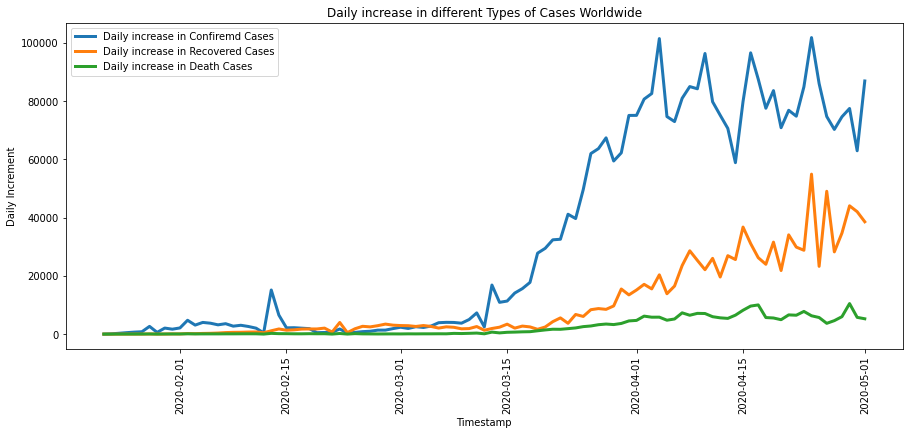

In [12]:
print("Average increase in number of Confirmed Cases every day: ",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered Cases every day: ",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths Cases every day: ",np.round(datewise["Deaths"].diff().fillna(0).mean()))

plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in Confiremd Cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in Recovered Cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in Death Cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily Increment")
plt.title("Daily increase in different Types of Cases Worldwide")
plt.xticks(rotation=90)
plt.legend()

# Predictions using Machine Learning Models

### Linear Regression Model for Confirmed Cases Prediction Worldwide

In [13]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]


In [14]:
lin_reg=LinearRegression(normalize=True)

lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))


Root Mean Square Error for Linear Regression:  1224635.1290959562


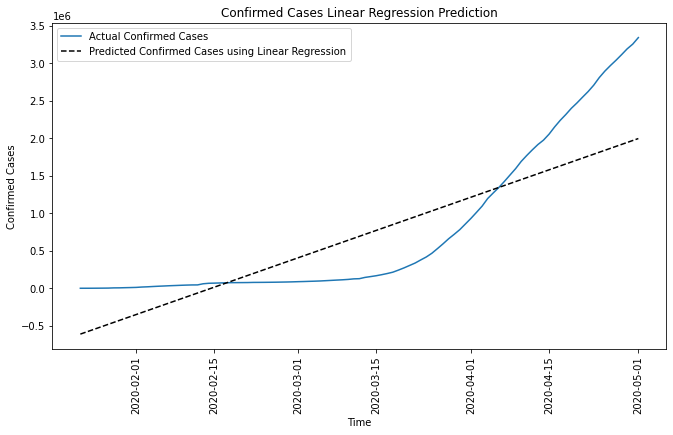

In [15]:
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
plt.plot(datewise["Confirmed"],label="Actual Confirmed Cases")
plt.plot(datewise.index,prediction_linreg, linestyle='--',label="Predicted Confirmed Cases using Linear Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Linear Regression Prediction")
plt.xticks(rotation=90)
plt.legend()

The Linear Regression Model is absolutely falling apart. As it is clearly visible that the trend of Confirmed Cases in absolutely not Linear.

In [16]:
#Polynomial Regression for Prediction of Confirmed Cases

train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

poly = PolynomialFeatures(degree = 2) 

train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]

linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  77702.83772242282


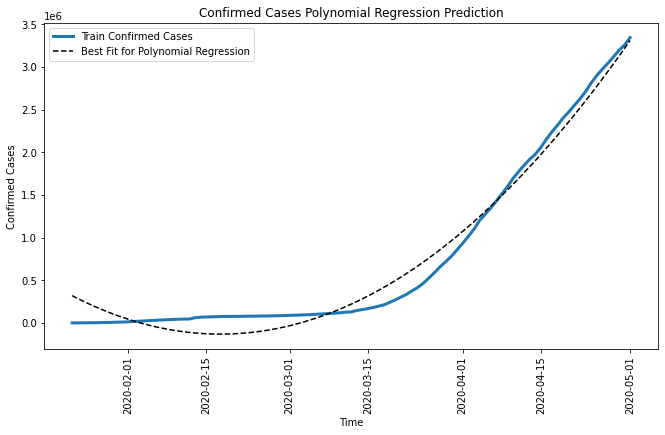

In [17]:
comp_data=poly.fit_transform(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)
plt.plot(datewise["Confirmed"],label="Train Confirmed Cases",linewidth=3)
plt.plot(datewise.index,predictions_poly, linestyle='--',label="Best Fit for Polynomial Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Polynomial Regression Prediction")
plt.xticks(rotation=90)
plt.legend()

In [18]:
new_prediction_poly=[]
for i in range(1,18):
    new_date_poly=poly.fit_transform(np.array(datewise["Days Since"].max()+i).reshape(-1,1))
    new_prediction_poly.append(linreg.predict(new_date_poly)[0])

In [19]:
#Support Vector Machine ModelRegressor for Prediction of Confirmed Cases
    
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]    

#Intializing SVR Model
svm=SVR(C=1,degree=5,kernel='poly',epsilon=0.01)

#Fitting model on the training data
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))
print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))


Root Mean Square Error for Support Vectore Machine:  366102.8687677054


,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction
0,2020-05-02,2023398.560750,3404751.643319,4123618.957786
1,2020-05-03,2049479.554955,3500410.958227,4328947.985536
2,2020-05-04,2075560.549160,3597346.939569,4542488.966799
3,2020-05-05,2101641.543365,3695559.587346,4764485.797426
4,2020-05-06,2127722.537570,3795048.901558,4995187.155316


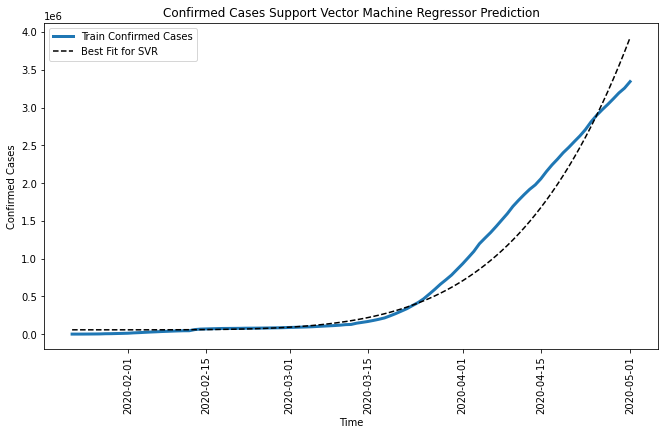

In [20]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Confirmed"],label="Train Confirmed Cases",linewidth=3)
plt.plot(datewise.index,prediction_svm, linestyle='--',label="Best Fit for SVR",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Support Vector Machine Regressor Prediction")
plt.xticks(rotation=90)
plt.legend()

new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])

pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_poly,new_prediction_svm),columns=["Dates","Linear Regression Prediction","Polynonmial Regression Prediction","SVM Prediction"])
model_predictions.head()

The Polynomial Regression has low RMSE value than Linear Regression and Support Vector Machine in predicting the number of cases worldwide.

## Preprocessing data for Continent-wise Analysis

In [21]:
#drop the columns not used in our analysis
case_time = case_time.drop(['Recovered','Active','Delta_Confirmed', 'Delta_Recovered',
       'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Province_State', 'FIPS', 'UID', 'iso3', 'Report_Date_String'],axis =1)

#renaming the column names
df_confirmed = df_confirmed.rename(columns={"Province/State":"State","Country/Region": "Country"})

df_deaths = df_deaths.rename(columns={"Province/State":"State","Country/Region": "Country"})

The name of countries in the dataset is not in standard format as per pycountry library, so the names needs to be modified.

In [22]:
#replacing the names of the country
case_time["Country_Region"].replace({'US': 'USA','Korea, South':'South Korea',
                'Taiwan*':'Taiwan','Congo (Kinshasa)':'Democratic Republic of the Congo',
                "Cote d'Ivoire":"Côte d'Ivoire",'Reunion':'Réunion',
                'Congo (Brazzaville)':'Republic of the Congo','Bahamas, The':'Bahamas',
                'Gambia, The':'Gambia'}, inplace=True)

df_confirmed["Country"].replace({'US': 'USA','Korea, South':'South Korea',
                'Taiwan*':'Taiwan','Congo (Kinshasa)':'Democratic Republic of the Congo',
                "Cote d'Ivoire":"Côte d'Ivoire",'Reunion':'Réunion',
                'Congo (Brazzaville)':'Republic of the Congo','Bahamas, The':'Bahamas',
                'Gambia, The':'Gambia'}, inplace=True)

df_deaths["Country"].replace({'US': 'USA','Korea, South':'South Korea',
                'Taiwan*':'Taiwan','Congo (Kinshasa)':'Democratic Republic of the Congo',
                "Cote d'Ivoire":"Côte d'Ivoire",'Reunion':'Réunion',
                'Congo (Brazzaville)':'Republic of the Congo','Bahamas, The':'Bahamas',
                'Gambia, The':'Gambia'}, inplace=True)

In [23]:
# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

In [24]:
# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

In [25]:
#insert continent column in all the three datasets 
case_time.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in case_time["Country_Region"].values])
case_time = case_time[case_time["continent"] != "Others"]

df_confirmed.insert(2,"continent", [continents[country_to_continent_code(country)] for country in df_confirmed["Country"].values])

df_deaths.insert(2,"continent", [continents[country_to_continent_code(country)] for country in df_confirmed["Country"].values])

### Defining Functions

* plot_params()
* visualize_covid_cases()

In [26]:
#replace nan values with blanks
df_confirmed = df_confirmed.replace(np.nan, '', regex=True)
df_deaths = df_deaths.replace(np.nan, '', regex=True)

In [27]:
#functions for vizualizations
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

In [28]:
#continent-wise trend analysis function
def contitent_wise_covid_cases(confirmed, deaths, continent=None , country = None , state = None, period = None, figure = None, scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    
    if continent != None:
        params = ["continent",continent]

    color = ["maroon","green"]
    marker_style = dict(linewidth=3,marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
        Total_confirmed =  np.sum(np.asarray(stats[0][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    # Plot Axes Labels
        axis_label = ["Days ("+df_confirmed.columns[5]+" - "+df_confirmed.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Title for each subplots
    plt.title("COVID-19 Cases for "+params[1] ,{'fontsize':25}) 
    
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()

### Exploring the data Continent-wise

In [29]:
df_continents= df_confirmed.groupby(["continent"]).sum()      
continents = df_continents.sort_values(df_continents.columns[-1],ascending = False).index

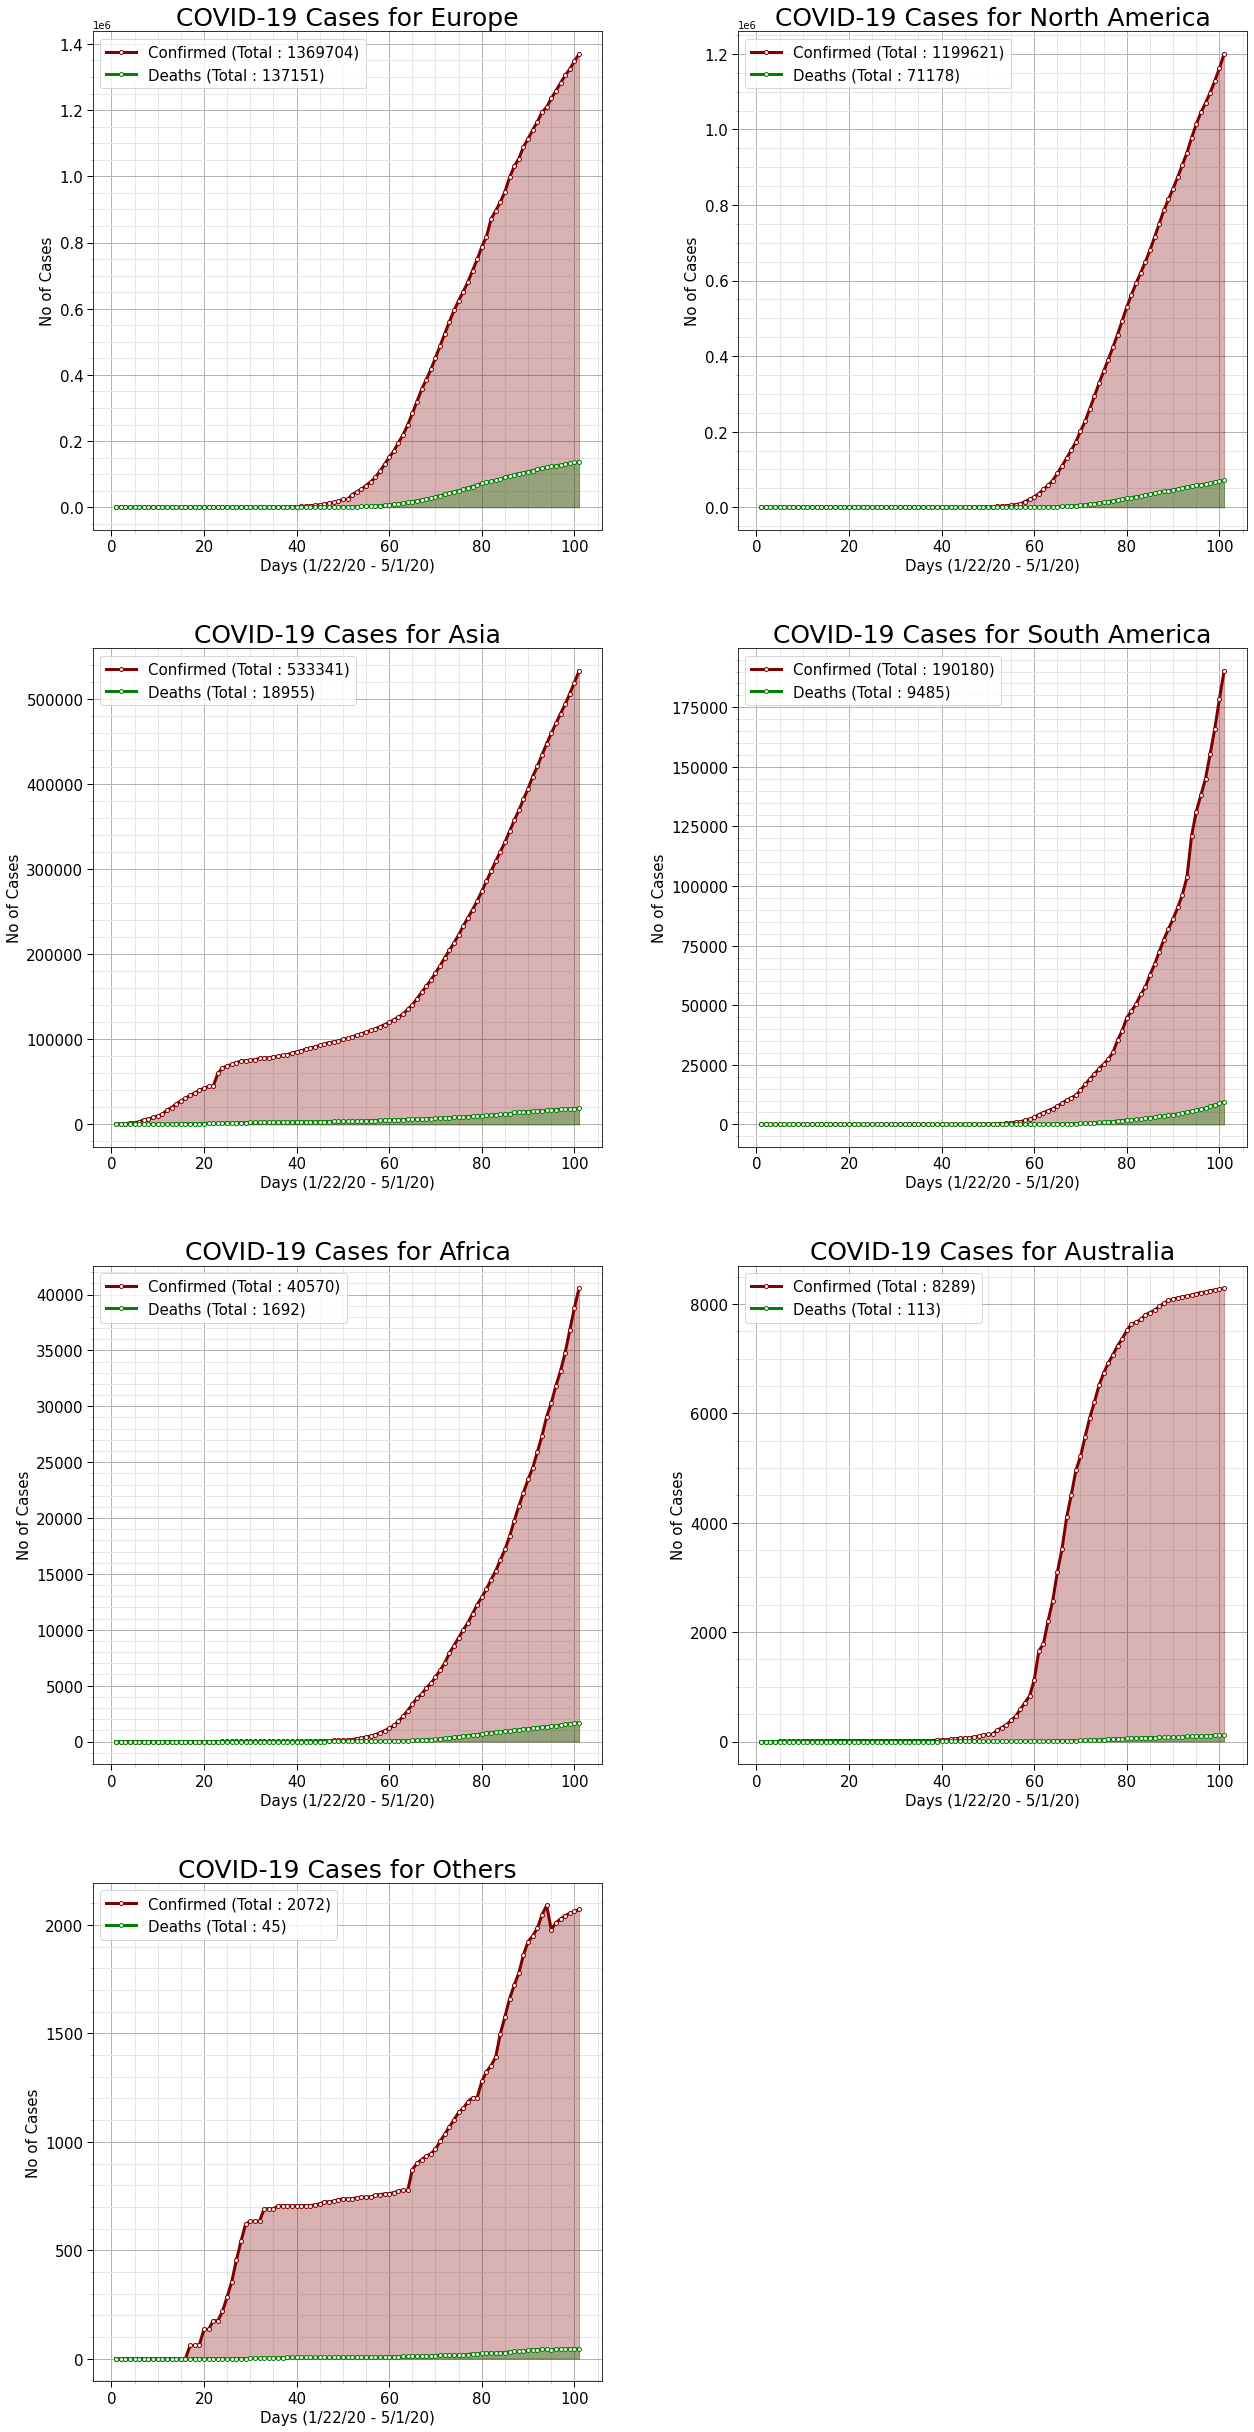

In [30]:
cols =2
rows = int(np.ceil(continents.shape[0]/cols))
f = plt.figure(figsize=(20,9*rows))
for i,continent in enumerate(continents):
    contitent_wise_covid_cases(df_confirmed,df_deaths,continent = continent,figure = [f,rows,cols, i+1])

plt.show()

From above plots, it can be seen that:-
* The number of confirmed cases are increasing exponentially over time in all the continents. 
* There is a increasing trend in number of deaths due to covid in all the continents


In [31]:
case_time.head()

,Country_Region,continent,Last_Update,Confirmed,Deaths
0,Afghanistan,Asia,2020-01-22,0.000000,0
1,Afghanistan,Asia,2020-01-23,0.000000,0
2,Afghanistan,Asia,2020-01-24,0.000000,0
3,Afghanistan,Asia,2020-01-25,0.000000,0
4,Afghanistan,Asia,2020-01-26,0.000000,0


### Exploring the data for top 10 countries having most confirmed cases

In [32]:
top = case_time[case_time['Last_Update'] == case_time['Last_Update'].max()]
top_cases_country = top.groupby(by = 'Country_Region')['Confirmed'].sum().sort_values(ascending = False).head(10).reset_index()
top_cases_country

,Country_Region,Confirmed
0,USA,1103461.000000
1,Spain,213435.000000
2,Italy,207428.000000
3,United Kingdom,178685.000000
4,France,167305.000000
5,Germany,164077.000000
6,Turkey,122392.000000
7,Russia,114431.000000
8,Iran,95646.000000
9,Brazil,92202.000000


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

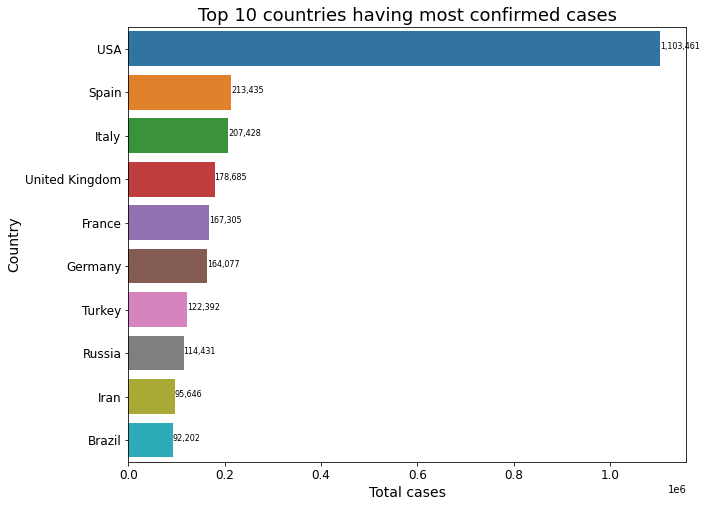

In [33]:
plt.figure(figsize= (10,8))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Total cases",fontsize = 14)
plt.ylabel('Country',fontsize = 14)
plt.title("Top 10 countries having most confirmed cases" , fontsize = 18)
ax = sns.barplot(x = top_cases_country.Confirmed, y = top_cases_country.Country_Region)
for i, (value, name) in enumerate(zip(top_cases_country.Confirmed,top_cases_country.Country_Region)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=8, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

In [34]:
case_nums_country = df_confirmed.groupby("Country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

### Exploring the data for top 10 countries having most confirmed cases on daily basis

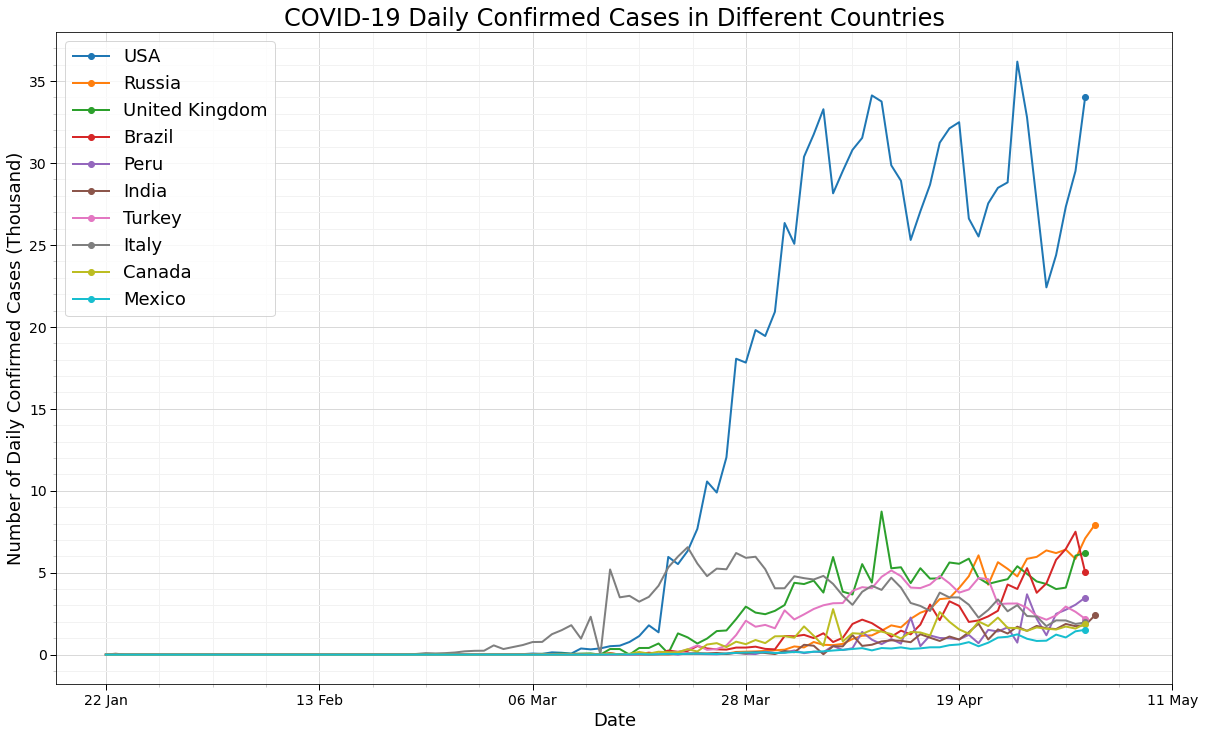

In [35]:
thoudand = 1000
prediction_days =10
temp = df_confirmed.groupby('Country').sum().diff(axis=1).sort_values(df_deaths.columns[-1],ascending =False).head(10).replace(np.nan,0)
threshold = 0
f = plt.figure(figsize=(20,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    t = temp.loc[temp.index== country].values[0]
    t = t[t>=threshold]
    
    date = np.arange(0,len(t[:]))
    plt.plot(date,t/thoudand,'-o',label = country,linewidth =2, markevery=[-1])
case_nums_country = df_confirmed.groupby("Country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)


nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total =d+nextdays

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

# Plot Title
plt.title("COVID-19 Daily Confirmed Cases in Different Countries",{'fontsize':24})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Daily Confirmed Cases (Thousand)",fontsize =18)

# plt.yscale("log")
plt.legend(fontsize=18) 
#plt.savefig(out+"daily confirmed cases countrywise.png")
plt.show()


We see that the number of covid confirmed cases are increasing tremendously for US than any other country daily.

## Analysis of US Cases

## Time Series Analysis

In [36]:
#Creating the dataframe for cases in USA
series_us = case_time[case_time['Country_Region'] == "USA"]
#Creating dataframe for time series implementation
series_us = series_us[["Last_Update","Confirmed"]]

In [37]:
#setting Last_Update as index
series_us = series_us.set_index("Last_Update")
series_us.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101 entries, 2020-01-22 to 2020-05-01
Data columns (total 1 columns):
Confirmed    101 non-null float64
dtypes: float64(1)
memory usage: 1.6 KB


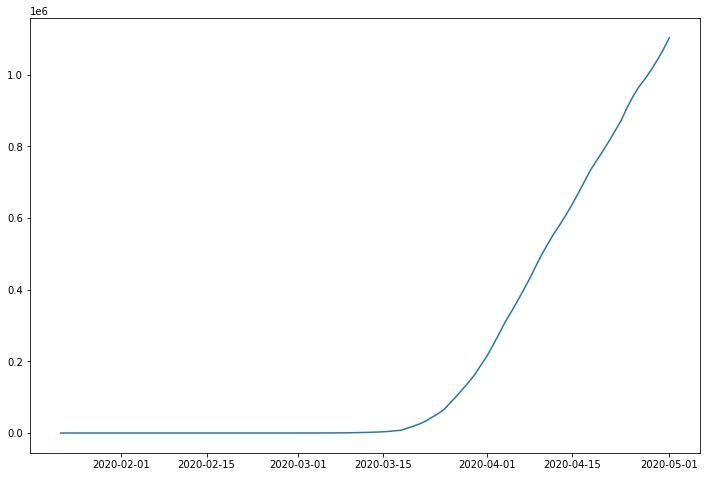

In [38]:
# line plot of dataset
plt.figure(figsize=(12,8))
plt.plot(series_us)

As per above plot,there is exponential increase in the number of cases.

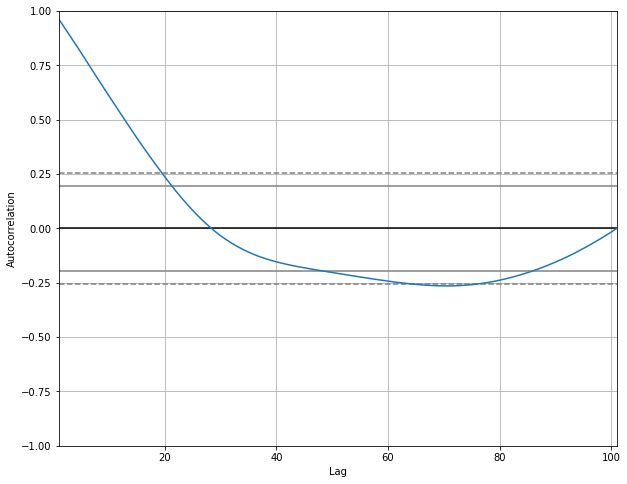

In [39]:
plt.figure(figsize=(10,8))
autocorrelation_plot(series_us)

The number of cases had positive correlation with initial lags and then there is a negative correlation after 25 lags.

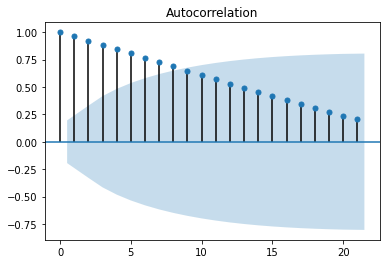

In [40]:
plot_acf(series_us)
pyplot.show()

From above plot it can be seen that the correlation had decreasing gradually.

### Predictions using ARIMA model

The parameters of the ARIMA model are defined as follows:

* p: The number of lag observations included in the model.
* d: The number of times that the raw observations are differenced.
* q: The size of the moving average window.

In [41]:
model2 = ARIMA(series_us, order=(5,1,0))
model_us = model2.fit(disp=0)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [42]:
print(model_us.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Confirmed   No. Observations:                  100
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -904.536
Method:                       css-mle   S.D. of innovations           2008.526
Date:                Sat, 09 May 2020   AIC                           1823.072
Time:                        18:55:46   BIC                           1841.308
Sample:                    01-23-2020   HQIC                          1830.452
                         - 05-01-2020                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.103e+04   1.44e+04      0.768      0.444   -1.71e+04    3.92e+04
ar.L1.D.Confirmed     1.0944      0.102     10.756      0.000       0.895       1.294
ar.L2.D.Confirmed    -0.

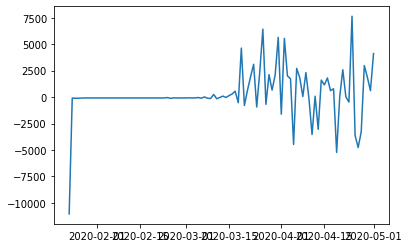

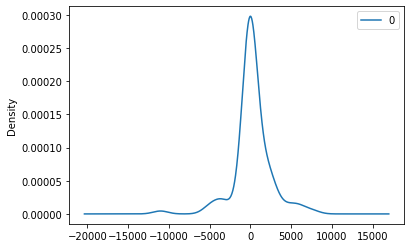

                  0
count    100.000000
mean     248.905664
std     2285.197944
min   -11034.601724
25%      -84.948636
50%      -80.375987
75%      619.298613
max     7637.485839


In [43]:
# plot residual errors
residuals = pd.DataFrame(model_us.resid)
plt.plot(residuals)
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

This suggests that the mean and variance is not stationary and will require differencing to make it stationary

In [44]:
X = series_us.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(2,2,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=215567.580683, expected=213242.000000
predicted=239567.851144, expected=243622.000000
predicted=273411.805745, expected=275367.000000
predicted=309212.145955, expected=308650.000000
predicted=342665.615088, expected=336802.000000
predicted=366012.750365, expected=366317.000000
predicted=394618.553720, expected=397121.000000
predicted=428456.414515, expected=428654.000000
predicted=460748.622915, expected=462780.000000
predicted=497269.378647, expected=496535.000000
predicted=531218.997491, expected=526396.000000
predicted=556767.501779, expected=555313.000000
predicted=583970.010202, expected=580619.000000
predicted=605928.697985, expected=607670.000000
predicted=634151.826724, expected=636350.000000
predicted=665599.194207, expected=667592.000000
predicted=699434.960299, expected=699706.000000
predicted=732613.120552, expected=732197.000000
predicted=765156.443976, expected=758809.000000
predicted=785747.984837, expected=784326.000000
predicted=809026.504578, expected=811865

In [45]:
mse_us_confirmed = mean_squared_error(test, predictions)
print('ARIMA Model MSE: %.3f' % mse_us_confirmed)
rmse_us_confirmed = np.sqrt(mse_us_confirmed)
print('ARIMA Model RMSE: %.3f' % rmse_us_confirmed)

ARIMA Model MSE: 11072802.336
ARIMA Model RMSE: 3327.582


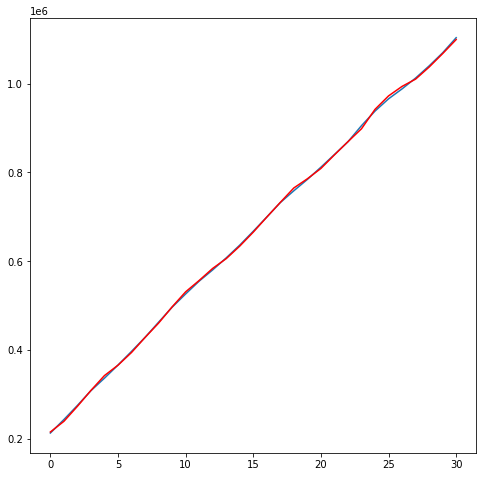

In [46]:
# plot
plt.figure(figsize=(8,8))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

The blue line represents the actual data points while red line shows the prediction values. The predictions looks to be pretty good though the root mean square value is quite on the higher side. This can be attributed to the huge variation in the cases.

### Predictions using Facebook Prophet

,Confirmed
Last_Update,
2020-01-22,1.000000
2020-01-23,1.000000
2020-01-24,2.000000
2020-01-25,2.000000
2020-01-26,5.000000


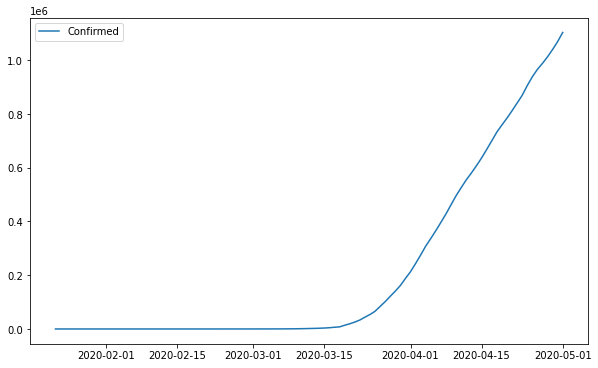

In [47]:
df_us = series_us.copy()
plt.figure(figsize=(10,6))
plt.plot(df_us)
plt.legend(['Confirmed'])
df_us.head()

Preparing the data explicitly as per facebook prophet model i.e creating the columns 'ds and 'y'.

In [48]:
df_us = df_us.reset_index()
df_us.columns = ['ds','y']
df_us.head()

,ds,y
0,2020-01-22,1.000000
1,2020-01-23,1.000000
2,2020-01-24,2.000000
3,2020-01-25,2.000000
4,2020-01-26,5.000000


In [49]:
us_prophet = Prophet(daily_seasonality=True)
us_prophet.fit(df_us)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [50]:
future_us = us_prophet.make_future_dataframe(periods=5)
forecast_us = us_prophet.predict(future_us)
forecast_us.tail().T

,101,102,103,104,105
ds,2020-05-02 00:00:00,2020-05-03 00:00:00,2020-05-04 00:00:00,2020-05-05 00:00:00,2020-05-06 00:00:00
trend,1132747.793120,1161736.066516,1190724.339913,1219712.613309,1248700.886705
yhat_lower,1132194.598347,1160227.614071,1187049.281965,1214339.819753,1241621.514654
yhat_upper,1136647.877050,1165318.697266,1193446.940547,1222862.624794,1253666.227926
trend_lower,1132747.793120,1161310.124541,1188832.889896,1215928.511299,1243200.839302
trend_upper,1132747.794984,1162495.298520,1193016.131571,1223671.478009,1254507.353153
additive_terms,1625.692660,864.774142,-533.754311,-1174.425969,-1261.168830
additive_terms_lower,1625.692660,864.774142,-533.754311,-1174.425969,-1261.168830
additive_terms_upper,1625.692660,864.774142,-533.754311,-1174.425969,-1261.168830
daily,-72.781389,-72.781389,-72.781389,-72.781389,-72.781389


In [51]:
forecast_us[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
101,2020-05-02,1134373.485780,1132194.598347,1136647.877050
102,2020-05-03,1162600.840658,1160227.614071,1165318.697266
103,2020-05-04,1190190.585601,1187049.281965,1193446.940547
104,2020-05-05,1218538.187340,1214339.819753,1222862.624794
105,2020-05-06,1247439.717875,1241621.514654,1253666.227926


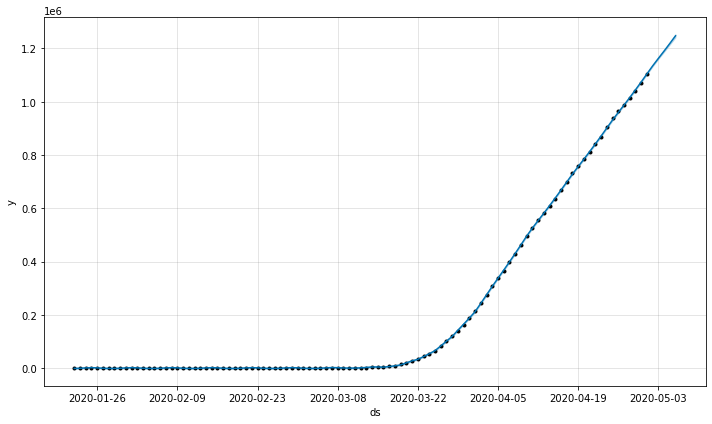

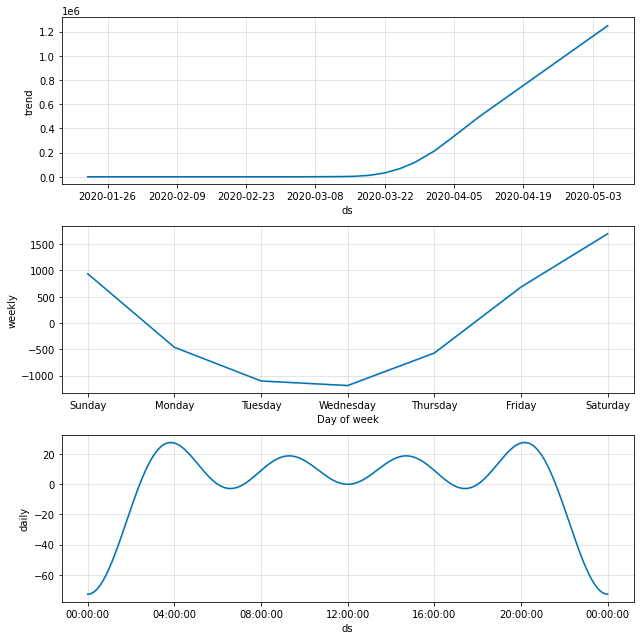

In [52]:
us_prophet.plot(forecast_us);
us_prophet.plot_components(forecast_us);

In [53]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [54]:
cross_validation_results = cross_validation(us_prophet, initial='95 days', period='5 days', horizon='5 days')
print(cross_validation_results)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-04-26 00:00:00 and 2020-04-26 00:00:00


          ds           yhat     yhat_lower     yhat_upper              y  \
0 2020-04-27  993307.812433  990925.979986  995591.817169  988197.000000   
1 2020-04-28 1022773.342278 1020073.039759 1025334.161836 1012582.000000   
2 2020-04-29 1052029.654139 1048741.993119 1055248.770942 1039909.000000   
3 2020-04-30 1082357.246861 1077453.915021 1086588.182872 1069424.000000   
4 2020-05-01 1113049.014893 1106382.007498 1118330.816746 1103461.000000   

      cutoff  
0 2020-04-26  
1 2020-04-26  
2 2020-04-26  
3 2020-04-26  
4 2020-04-26  


In [55]:
performance_metrics_results = performance_metrics(cross_validation_results)
print(performance_metrics_results)

  horizon              mse         rmse          mae     mape    mdape  \
0  1 days  26120403.720753  5110.812433  5110.812433 0.005172 0.005172   
1  2 days 103863457.435870 10191.342278 10191.342278 0.010065 0.010065   
2  3 days 146910256.750953 12120.654139 12120.654139 0.011655 0.011655   
3  4 days 167268874.379824 12933.246861 12933.246861 0.012094 0.012094   
4  5 days  91930029.588667  9588.014893  9588.014893 0.008689 0.008689   

   coverage  
0  0.000000  
1  0.000000  
2  0.000000  
3  0.000000  
4  0.000000  


cross validation to measure forecast error using historical data. 

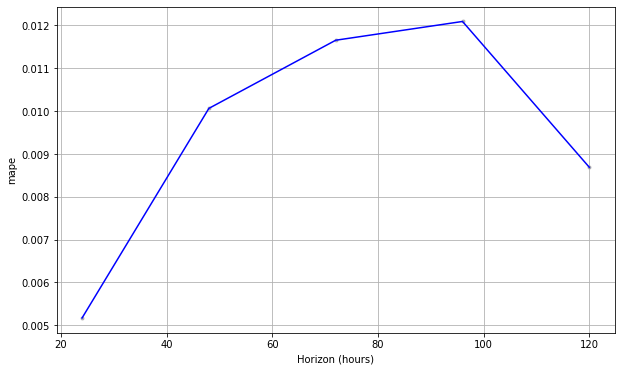

In [56]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cross_validation_results, metric='mape')

ARIMA model seems to have low RMSE value than Facebook Prophet model and hence, it performs better the available data.

### US Death Cases Prediction using Time Series

#### ARIMA Model

In [57]:
#Creating the dataframe for cases in USA
series_us_deaths = case_time[case_time['Country_Region'] == "USA"]
#Creating dataframe for time series implementation
series_us_deaths = series_us_deaths[["Last_Update","Deaths"]]

In [58]:
#setting Last_Update as index
series_us_deaths = series_us_deaths.set_index("Last_Update")
series_us_deaths.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101 entries, 2020-01-22 to 2020-05-01
Data columns (total 1 columns):
Deaths    101 non-null int64
dtypes: int64(1)
memory usage: 1.6 KB


In [59]:
print(series_us_deaths.head(5))

             Deaths
Last_Update        
2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0


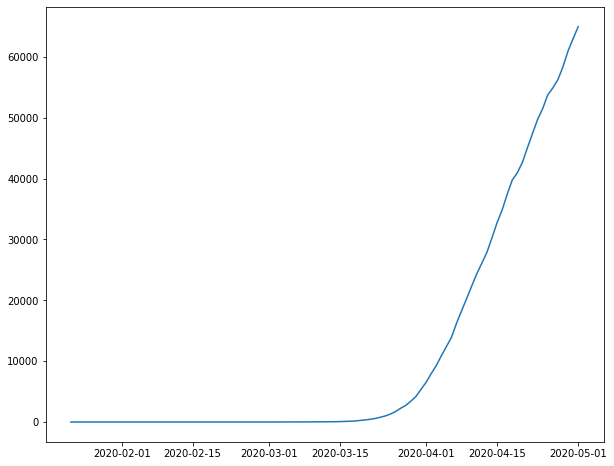

In [60]:
plt.figure(figsize=(10,8))
plt.plot(series_us_deaths)

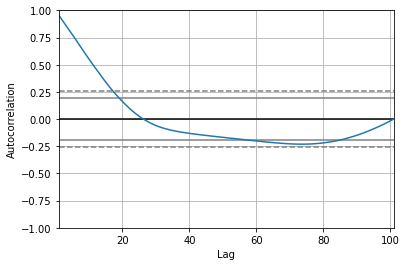

In [61]:
autocorrelation_plot(series_us_deaths)


In [62]:
X = series_us_deaths.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(2,2,0))
	model_fit = model.fit(disp=5)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=24416.253615, expected=24342.000000
predicted=26402.905068, expected=26086.000000
predicted=27910.250815, expected=27870.000000
predicted=29658.870781, expected=30262.000000
predicted=32548.697840, expected=32734.000000
predicted=35177.551094, expected=34827.000000
predicted=37008.833625, expected=37411.000000
predicted=39986.496963, expected=39753.000000
predicted=42127.508004, expected=40945.000000
predicted=42542.525504, expected=42659.000000
predicted=44779.686233, expected=45086.000000
predicted=47086.303001, expected=47412.000000
predicted=49446.629763, expected=49724.000000
predicted=52127.117756, expected=51493.000000
predicted=53405.131047, expected=53755.000000
predicted=56179.035465, expected=54881.000000
predicted=56273.844452, expected=56259.000000
predicted=57909.891135, expected=58355.000000
predicted=60142.460684, expected=60967.000000
predicted=63261.527170, expected=62996.000000
predicted=65033.316842, expected=64943.000000


In [63]:
mse_us_death = mean_squared_error(test, predictions)
print('ARIMA model MSE: %.3f' % mse_us_death)

ARIMA model MSE: 271420.010


In [64]:
rmse_us_death = np.sqrt(mse_us_death)
print('ARIMA model RMSE: %.3f' % rmse_us_death)

ARIMA model RMSE: 520.980


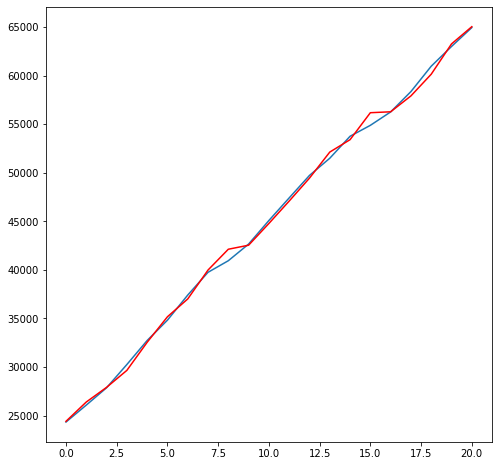

In [65]:
plt.figure(figsize=(8,8))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

#### Facebook Prophet Model

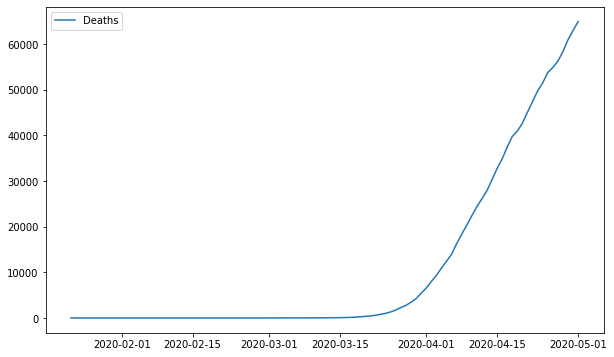

In [66]:
df_us_deaths = series_us_deaths.copy()
plt.figure(figsize=(10,6))
plt.plot(df_us_deaths)
plt.legend(['Deaths'])

In [67]:
df_us_deaths = df_us_deaths.reset_index()
df_us_deaths.columns = ['ds','y']
df_us_deaths.head()

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [68]:
prophet_us_deaths = Prophet(daily_seasonality=True)
prophet_us_deaths.fit(df_us_deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [69]:
future_us_deaths = prophet_us_deaths.make_future_dataframe(periods=5)
forecast_us_deaths = prophet_us_deaths.predict(future_us_deaths)
forecast_us_deaths.tail().T

,101,102,103,104,105
ds,2020-05-02 00:00:00,2020-05-03 00:00:00,2020-05-04 00:00:00,2020-05-05 00:00:00,2020-05-06 00:00:00
trend,67333.431834,69375.037764,71416.643694,73458.249623,75499.855553
yhat_lower,67154.127995,68983.521996,70838.107069,72965.054309,75045.298371
yhat_upper,67771.678456,69626.783447,71575.241481,73777.981902,76023.635538
trend_lower,67327.488713,69315.401573,71267.824956,73188.568113,75104.393759
trend_upper,67333.431834,69412.640161,71541.588963,73703.426666,75866.721089
additive_terms,116.786314,-70.340682,-195.839264,-91.383217,21.774159
additive_terms_lower,116.786314,-70.340682,-195.839264,-91.383217,21.774159
additive_terms_upper,116.786314,-70.340682,-195.839264,-91.383217,21.774159
daily,-19.842154,-19.842154,-19.842154,-19.842154,-19.842154


In [70]:
forecast_us_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
101,2020-05-02,67450.218148,67154.127995,67771.678456
102,2020-05-03,69304.697082,68983.521996,69626.783447
103,2020-05-04,71220.804429,70838.107069,71575.241481
104,2020-05-05,73366.866406,72965.054309,73777.981902
105,2020-05-06,75521.629712,75045.298371,76023.635538


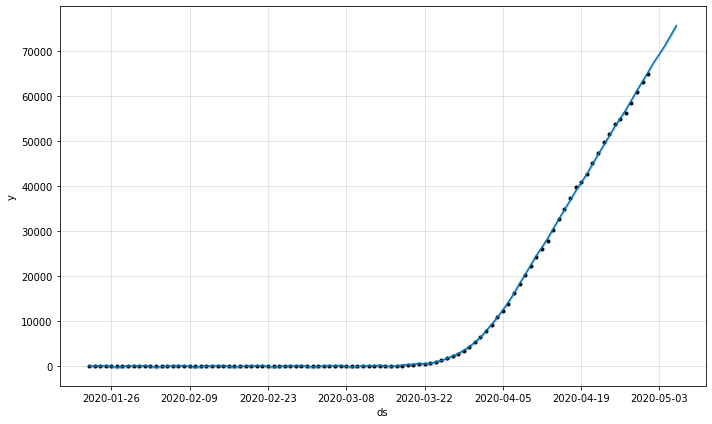

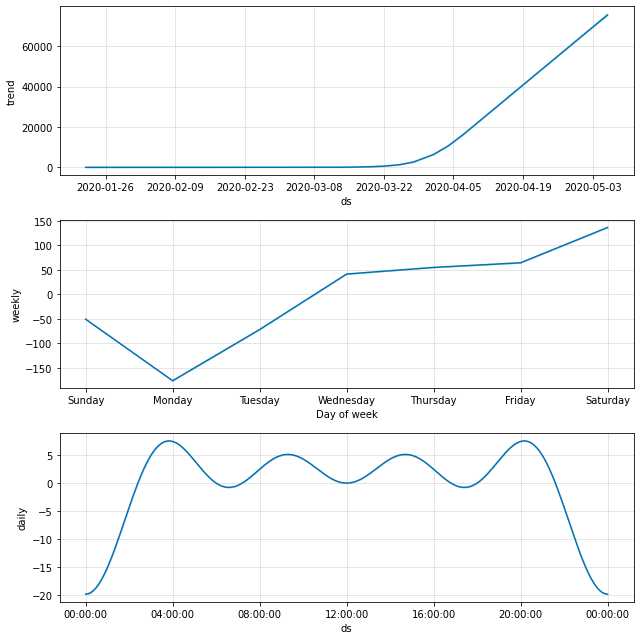

In [71]:
prophet_us_deaths.plot(forecast_us_deaths);
prophet_us_deaths.plot_components(forecast_us_deaths);

In [72]:
cross_validation_results_deaths = cross_validation(prophet_us_deaths, initial='90 days', period='10 days', horizon='10 days')
print(cross_validation_results_deaths)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-04-21 00:00:00 and 2020-04-21 00:00:00


          ds         yhat   yhat_lower   yhat_upper      y     cutoff
0 2020-04-22 46748.158273 46404.421841 47062.240029  47412 2020-04-21
1 2020-04-23 48817.202028 48441.756727 49163.521009  49724 2020-04-21
2 2020-04-24 50829.195806 50419.857580 51229.260044  51493 2020-04-21
3 2020-04-25 52800.250605 52319.036691 53224.310080  53755 2020-04-21
4 2020-04-26 54677.067688 54095.370310 55171.532421  54881 2020-04-21
5 2020-04-27 56604.922035 55944.072969 57232.900337  56259 2020-04-21
6 2020-04-28 58727.564809 57886.260454 59493.141809  58355 2020-04-21
7 2020-04-29 60772.791964 59832.056850 61711.906198  60967 2020-04-21
8 2020-04-30 62841.835720 61717.270770 63966.588684  62996 2020-04-21
9 2020-05-01 64853.829497 63525.253432 66153.446354  64943 2020-04-21


In [73]:
performance_metrics_results_deaths = performance_metrics(cross_validation_results_deaths)
print(performance_metrics_results_deaths)

  horizon           mse       rmse        mae     mape    mdape  coverage
0  1 days 440685.838656 663.841727 663.841727 0.014002 0.014002  0.000000
1  2 days 822282.561621 906.797972 906.797972 0.018237 0.018237  0.000000
2  3 days 440636.008198 663.804194 663.804194 0.012891 0.012891  0.000000
3  4 days 911546.407608 954.749395 954.749395 0.017761 0.017761  0.000000
4  5 days  41588.387869 203.932312 203.932312 0.003716 0.003716  1.000000
5  6 days 119662.054225 345.922035 345.922035 0.006149 0.006149  1.000000
6  7 days 138804.536846 372.564809 372.564809 0.006384 0.006384  1.000000
7  8 days  37716.761177 194.208036 194.208036 0.003185 0.003185  1.000000
8  9 days  23766.625378 154.164280 154.164280 0.002447 0.002447  1.000000
9 10 days   7951.378583  89.170503  89.170503 0.001373 0.001373  1.000000


From the above two model,the facebook prophet model performs better in predicting the death cases in US.
Comparing the root mean square value of two models

* Facbook prophet model has RMSE of 89.  
* ARIMA has RMSE of 520.